In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import plotly.express as px

In [10]:
dfs = {i:None for i in range(2013, 2023)}
d = '../../../eismas/'
for key in dfs.keys():
    f = d+f'ei_{key}_12_31.json'
    print(f'R:{f}', end='\r')
    df = pd.read_json(f)[['schema2','neblaivusKaltininkai', 'apsvaigeKaltininkai',
                          'dalyviuSkaicius','zuvusiuSkaicius','suzeistuSkaicius', 
                          'apgadintuTpSkaicius', 'eismoDalyviai', 'eismoTranspPreimone']]
    dfs[key] = df

In [7]:
# print(plt.style.available)
plt.style.use(style='default')
plt.style.use(style='fivethirtyeight')

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (10,) + inhomogeneous part.

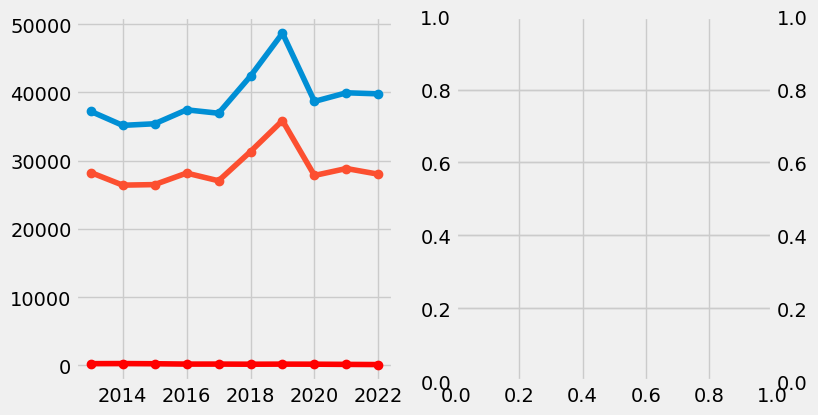

In [11]:
# Dalyvių kiekis kiekvienais metais
# Apgadintų TP kiekis kas metus
# Žuvusių kiekis kiekvienais metais
#  Sužeistų kiekis kiekvienais metais

dalyviai, apgadintosTP, zuvusieji, suzeistieji = [], [], [], []
metai = []
for year, df in dfs.items():
    metai.append(year)
    dalyviai.append(df['dalyviuSkaicius'].sum())
    apgadintosTP.append(df['apgadintuTpSkaicius'].sum())
    zuvusieji.append(df['zuvusiuSkaicius'].sum())
    suzeistieji.append(df['suzeistuSkaicius'])
    
    
fig, (axis, axis2) = plt.subplots(1, 2, figsize=(8, 4.5))

ax2 = axis2.twinx()
axis.plot(metai, dalyviai, label='Dalyviai', marker='o')
axis.plot(metai, apgadintosTP, label='apgadintos TP', marker='o')

line = axis.plot(metai, zuvusieji, label='zuvusieji', marker='o', color='red')
line2 = ax2.plot(metai, suzeistieji, label='suzeistieji', marker='o')
axis.legend(loc='best')
lines = line + line2
labels = [l.get_label() for l in lines]
axis2.legend(lines, labels, loc='best')

axis.set_xticks(metai)
axis2.set_xticks(metai)
axis.tic_params(axis='x', rotation=90)
axis2.tic_params(axis='x', rotation=90)
ax2.tick_params(axis='y', labelcolor='blue')
fig.tight_layout()
plt.show()

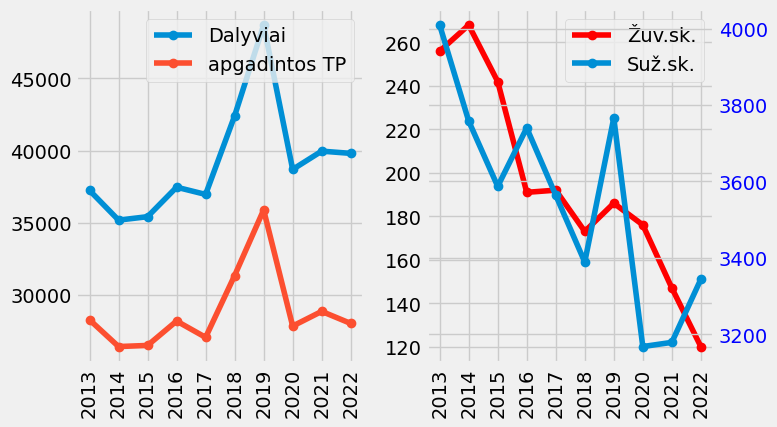

In [12]:
dal, apTP, zuv, suz = [],[],[],[]
years = []
for year, df in dfs.items():
    years.append(year)
    dal.append(df['dalyviuSkaicius'].sum())
    apTP.append(df['apgadintuTpSkaicius'].sum())
    zuv.append(df['zuvusiuSkaicius'].sum())
    suz.append(df['suzeistuSkaicius'].sum())

fig, (axis, axis2) = plt.subplots(1,2,figsize=(8,4.5))
#plotting code:

ax2 = axis2.twinx()
axis.plot(years, dal, label='Dalyviai', marker='o')
axis.plot(years, apTP, label='apgadintos TP', marker='o')

line = axis2.plot(years, zuv, label='Žuv.sk.', marker='o', color='red')
line2 = ax2.plot(years, suz, label='Suž.sk.', marker='o')
axis.legend(loc='best')
lines = line+line2
labels = [l.get_label() for l in lines]
axis2.legend(lines, labels, loc='best')
#axis.ticklabel_format(style='plain')
axis.set_xticks(years)
axis2.set_xticks(years)
axis.tick_params(axis='x', rotation=90)
axis2.tick_params(axis='x', rotation=90)
ax2.tick_params(axis='y', labelcolor='blue')
fig.tight_layout()
plt.show()